In [1]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys


from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)
import scripts.functions as fn

from scripts.indicators import find_pivots,donchian

c:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www\backtest
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [2]:
#klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)

start_date = klines_file.split('/')[4].split('_')[3] #Extrae la fecha de inicio
start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
start_date = start_date.replace(hour=0, minute=0, second=0)




In [3]:

class Strategy:
       
    def signal(self,df):
       
        
        # Pivots
        df['ma'] = df['close'].rolling(window=21).mean()
        
         
        df = find_pivots(df)

        #df['min_pivots'] = np.where(df['min_pivots']<0,df['low'],None)
        #df['max_pivots'] = np.where(df['max_pivots']>0,df['high'],None)
        
        
        #df['compra'] = df['low_prev'] > 0
        #df['venta']  = df['high_prev'] > 0

        #df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        #df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])
        

        """ 
        df = donchian(df)
        df['dch_amp'] = df['dch_max'] - df['dch_min']
        df['compra'] = (df['close'] < df['dch_mean']) & (df['dch_max'] == df['dch_max'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))
        df['venta']  = (df['close'] > df['dch_mean']) & (df['dch_amp'] == df['dch_amp'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        """
        #df.reset_index(inplace=True)
        return df


" \ndf[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])\n"

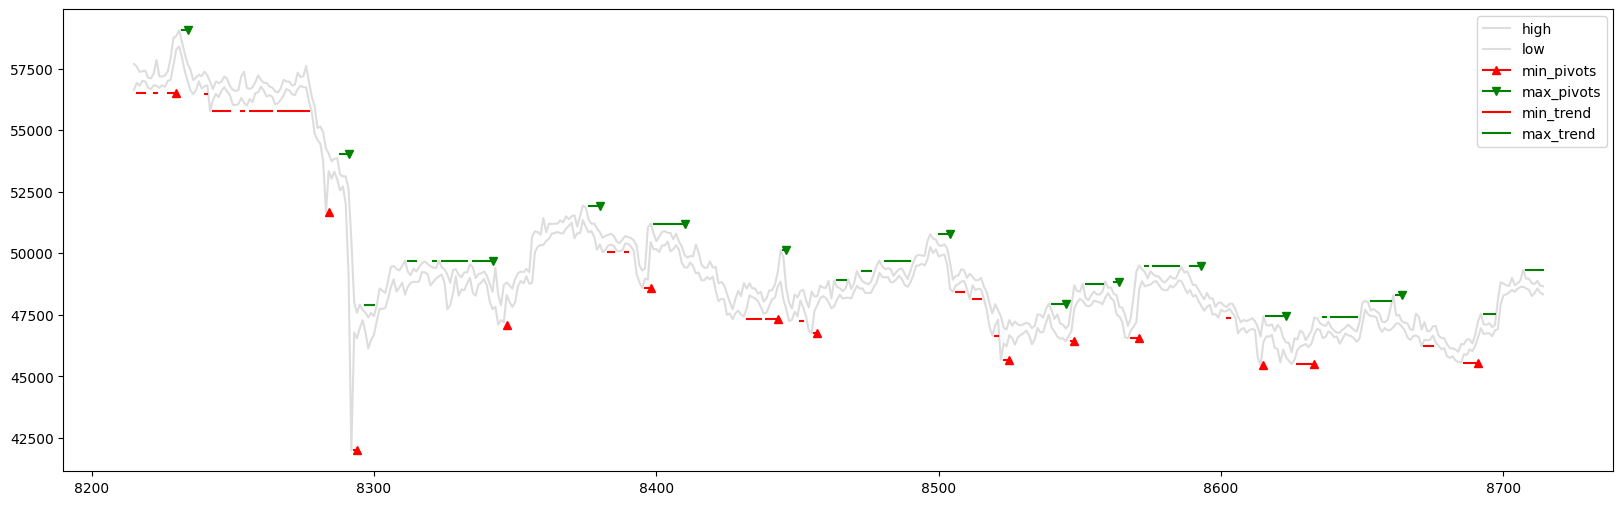

In [4]:

# Aplicar la función signal
df = Strategy().signal(df)
#df.set_index('datetime',inplace=True)
df = df[df['datetime'] >= start_date]


#for i in df.index:



#Pivots
#df['buy_price']  = None#np.where(df['compra'],df['close'],None)
#df['sell_price'] = None#np.where(df['venta'],df['close'],None)
df[8000:8500][['high','low','min_pivots','max_pivots','min_trend','max_trend']].plot(figsize=(20,6),style=['#dddddd','#dddddd','r-^','g-v','r','g'])#   ,'buy_price','sell_price'
""" 
df[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])
"""
